In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from ipywidgets import interact_manual

# Superconductivty Data
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#)

In [2]:
train = pd.read_csv('superconduct/train.csv')
unique_m = pd.read_csv('superconduct/unique_m.csv')

In [3]:
train.head() #81 features extracted from 21263 superconductors along with the critical temperature in the last column

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
unique_m.head() #the chemical formula broken up for all the 21263 superconductors

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


## The goal here is to predict the critical temperature ($T_c$) based on the features extracted.

In [5]:
Tc = unique_m['critical_temp'].values
feat = train.iloc[:,:-1].values
feat_names = train.iloc[:,:-1].columns.values

print('Tc =\n', Tc, '\nshape =', Tc.shape, end='\n'+'='*75+'\n')
print('feat =\n', feat, '\nshape =', feat.shape, end='\n'+'='*75+'\n')
print('feat_names =\n', feat_names, '\nshape =', feat_names.shape)

Tc =
 [29.   26.   19.   ...  1.98  1.84 12.8 ] 
shape = (21263,)
feat =
 [[ 4.         88.9444675  57.86269229 ...  1.08571429  0.4330127
   0.43705882]
 [ 5.         92.729214   58.51841614 ...  1.12857143  0.63245553
   0.46860627]
 [ 4.         88.9444675  57.88524186 ...  1.11428571  0.4330127
   0.44469664]
 ...
 [ 2.         99.66319    95.609104   ...  3.2         0.5
   0.4       ]
 [ 2.         99.66319    97.0956022  ...  2.21        0.5
   0.46249324]
 [ 3.         87.46833333 86.8585     ...  1.8         1.41421356
   1.5       ]] 
shape = (21263, 81)
feat_names =
 ['number_of_elements' 'mean_atomic_mass' 'wtd_mean_atomic_mass'
 'gmean_atomic_mass' 'wtd_gmean_atomic_mass' 'entropy_atomic_mass'
 'wtd_entropy_atomic_mass' 'range_atomic_mass' 'wtd_range_atomic_mass'
 'std_atomic_mass' 'wtd_std_atomic_mass' 'mean_fie' 'wtd_mean_fie'
 'gmean_fie' 'wtd_gmean_fie' 'entropy_fie' 'wtd_entropy_fie' 'range_fie'
 'wtd_range_fie' 'std_fie' 'wtd_std_fie' 'mean_atomic_radius'
 'wtd_mean_

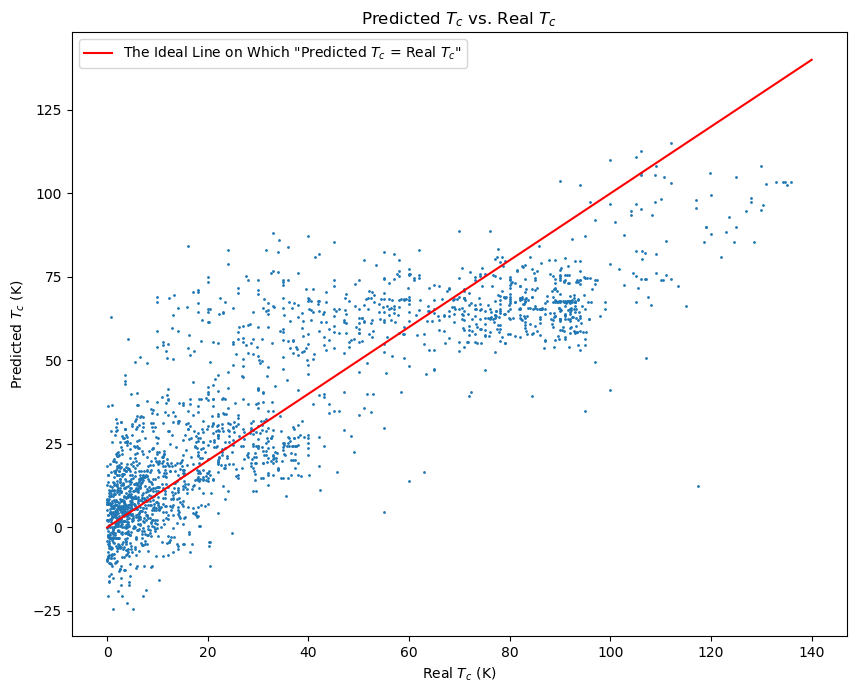

In [6]:
feat_train, feat_test, Tc_train, Tc_test = train_test_split(feat, Tc, test_size=0.1, random_state=1)

regr = LinearRegression()
regr.fit(feat_train, Tc_train)
Tc_test_pred = regr.predict(feat_test)

plt.figure(figsize=(10,8), dpi=100)
plt.scatter(Tc_test, Tc_test_pred, s=1)
plt.plot([0,140], [0,140], 'r', label='The Ideal Line on Which "Predicted $T_c$ = Real $T_c$"')
plt.title('Predicted $T_c$ vs. Real $T_c$')
plt.xlabel('Real $T_c$ (K)')
plt.ylabel('Predicted $T_c$ (K)')
plt.legend()
plt.show()

## Linear regression poorly works 😢

### Implement the code below in your own IPython to check out those 81 Tc-feature plots:

In [7]:
def Tc_feat_plot(feature):
    f = feat_test[:,feature]
    
    fig, ax = plt.subplots(1, 1, figsize=(10,8), dpi=100)
    
    ax.scatter(f, Tc_test, s=1, label='Real $T_c$')
    ax.scatter(f, Tc_test_pred, c='r', s=1, label='Predicted $T_c$')
    
    ax.set_title('$T_c$ vs. ' + feat_names[feature])
    ax.set_xlabel(feat_names[feature])
    ax.set_ylabel('$T_c$ (K)')
    
    ax.legend()
    plt.show()
    
interact_manual(Tc_feat_plot, feature=dict(zip(feat_names,range(len(feat_names)))));

interactive(children=(Dropdown(description='feature', options={'number_of_elements': 0, 'mean_atomic_mass': 1,…